In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("C:\\Users\\Sanjana\\Desktop\\Datasets\\black-friday\\BlackFriday.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [4]:
df.isnull().values.any()

True

In [5]:
df.columns[df.isna().any()].tolist()

['Product_Category_2', 'Product_Category_3']

In [6]:
print("Unique users",df['User_ID'].nunique())
print("Unique products",df['Product_ID'].nunique())

Unique users 5891
Unique products 3623


In [7]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


5891


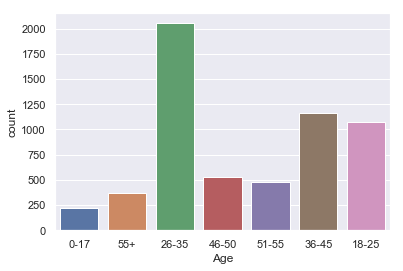

In [8]:
df_unique=df.drop_duplicates(subset='User_ID',inplace=False)
print(len(df_unique))
sns.set(style= "darkgrid")
sns.countplot(x='Age',data=df_unique)

Since there are multiple purchases made by a single user, only unique rows are taken to determine which age group has the highest rate of purchasing.
As seen from above plot, users in the range of 26-35 years are frequent customers.

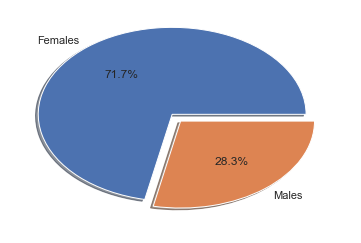

In [9]:
count_males=df_unique[df_unique['Gender']=='M'].count()
count_females=df_unique[df_unique['Gender']=='F'].count()
#print(count_males)
labels='Females','Males'
sizes=[count_males.Gender,count_females.Gender]
explode=(0.1,0)
plt.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%',shadow=True)
plt.show()

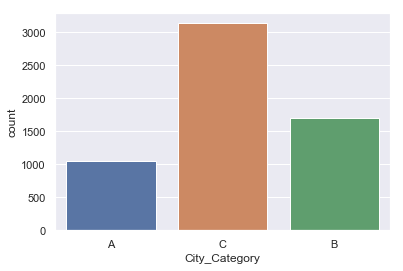

In [10]:
sns.countplot(x='City_Category',data=df_unique)

Most users are from City C.

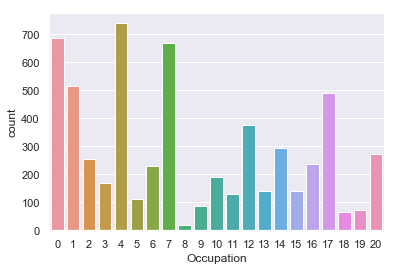

In [11]:
sns.countplot(x='Occupation',data=df_unique)

Since occupation category does not follow a regular trend, this column can be eliminated from the dataset.

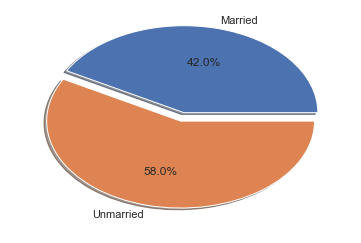

In [12]:
count_married=df_unique[df_unique['Marital_Status']==1].count()
count_unmarried=df_unique[df_unique['Marital_Status']==0].count()
labels='Married','Unmarried'
sizes=[count_married.Marital_Status,count_unmarried.Marital_Status]
explode=(0.1,0)
plt.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%',shadow=True)
plt.show()

As seen from the percentages above, 58% of the users are unmarried.

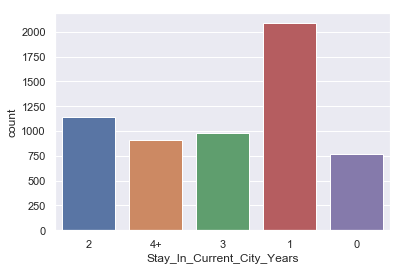

In [13]:
sns.countplot(x='Stay_In_Current_City_Years',data=df_unique)

It is seen that beginning with residing for one year to more than 4 years int the current city, the number of purchases goes down.

However, this information is not needed in the analysis of product data further and hence can be eliminated.

In [14]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [15]:
len(df)

537577

c:\users\sanjana\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


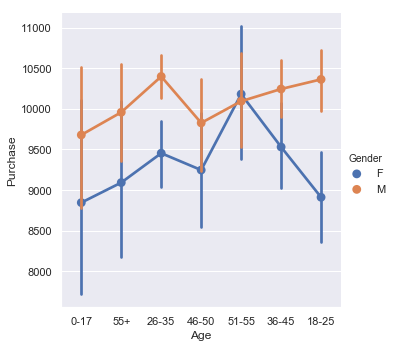

In [16]:
sns.catplot(x='Age',y='Purchase',data=df_unique,hue='Gender',kind='point')

From the graph we can see that males dominate in terms of purchase in all age groups except 51-55 where females are slightly higher.

In [17]:
df=df.replace({'Product_Category_2':np.nan,'Product_Category_3':np.nan},0)
df.drop('Occupation',axis=1,inplace=True)
df.head()

,User_ID,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,C,4+,0,8,0.0,0.0,7969


Since Product_Category_2 and Product_Category_3 had NaNs, we replace them with 0 in order to indicate that the user did not buy any product in that category. 
In addition, occupation does not follow a regular trend and can be eliminted.

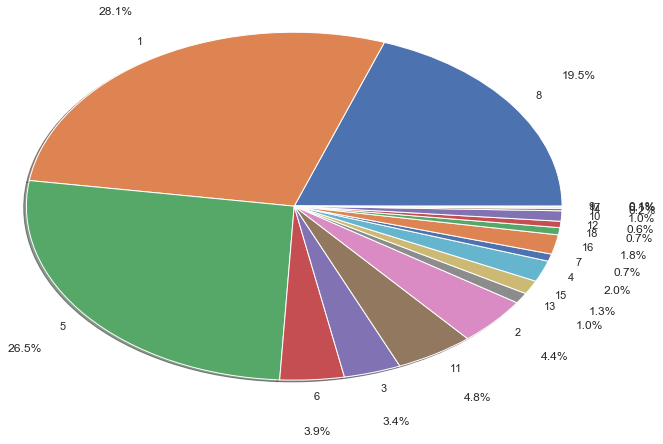

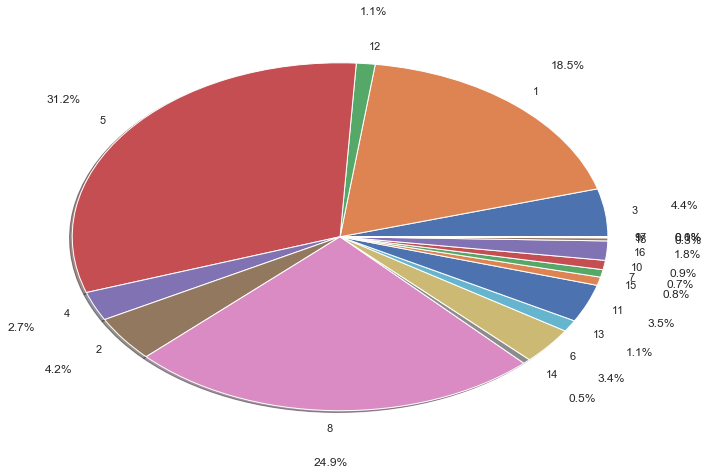

In [18]:
prod1_cat_names=[]
freq={}
df_males=df.loc[df.Gender=='M']
df_females=df.loc[df.Gender=='F']

for prod in df_males['Product_Category_1']:
    if prod not in prod1_cat_names:
        prod1_cat_names.append(prod)
    if prod in freq:
        freq[prod]+=1
    else:
        freq[prod]=1
keys=freq.keys()
values=freq.values()

plt.pie(values,labels=keys,autopct='%1.1f%%',shadow=True,radius=2,pctdistance=1.3,labeldistance=1.1)
plt.show()

prod1_cat_names1=[]
freq1={}
for prod1 in df_females['Product_Category_1']:
    if prod1 not in prod1_cat_names1:
        prod1_cat_names1.append(prod1)
    if prod1 in freq1:
        freq1[prod1]+=1
    else:
        freq1[prod1]=1
keys1=freq1.keys()
values1=freq1.values()

plt.pie(values1,labels=keys1,autopct='%1.1f%%',shadow=True,radius=2,pctdistance=1.3,labeldistance=1.1)
plt.show()

Among males, product 1 was the most purchased product accounting to 28.1% of total sales, followed by product 5 at 26.5% and product 8 at 19.5%. 

Among females, product 5 was the most purchased accounting to 31.2% of total sales, followed by product 8 at 24.9% and product 1 at 18.5%.

In [19]:
df_u=df.drop_duplicates(subset='Product_Category_2',inplace=False)
prod2=[]
for p in df_u['Product_Category_2']:
    if p not in prod2:
        prod2.append(p)
print(prod2)

[0.0, 6.0, 14.0, 2.0, 8.0, 15.0, 16.0, 11.0, 5.0, 3.0, 4.0, 12.0, 9.0, 10.0, 17.0, 13.0, 7.0, 18.0]


In [20]:
print("City A purchase total",df['Purchase'][df['City_Category'] == 'A'].sum())
print("City B purchase total",df['Purchase'][df['City_Category'] == 'B'].sum())
print("City C purchase total",df['Purchase'][df['City_Category'] == 'C'].sum())

City A purchase total 1295668797
City B purchase total 2083431612
City C purchase total 1638567969


From the above values we can say that City B users spent the maximum followed by City C and then City A.

In [21]:
no_buyers=df.loc[df.Product_Category_2==0.0]
len_no_buyers=len(no_buyers)
len_df=len(df)
print("Number of non-buyers",len_no_buyers)
print("Total users",len_df)
print("In Product_Category_2,",(np.round((len_no_buyers/len_df)*100,decimals=2)),"% of buyers do not purchase this category products.")

Number of non-buyers 166986
Total users 537577
In Product_Category_2, 31.06 % of buyers do not purchase this category products.


In [22]:
no_buyers=df.loc[df.Product_Category_3==0.0]
len_no_buyers=len(no_buyers)
len_df=len(df)
print("Number of non-buyers",len_no_buyers)
print("Total users",len_df)
print("In Product_Category_3,",(np.round((len_no_buyers/len_df)*100,decimals=2)),"% of buyers do not purchase this category products.")

Number of non-buyers 373299
Total users 537577
In Product_Category_3, 69.44 % of buyers do not purchase this category products.


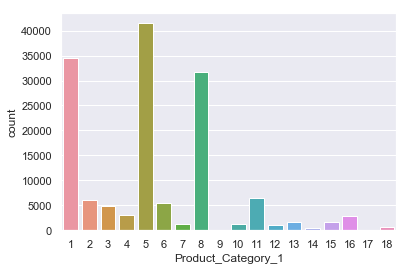

In [23]:
city_a_users=df.loc[df.City_Category=='A']
sns.countplot(x='Product_Category_1',data=city_a_users)

In City A, product 5 was bought the most.

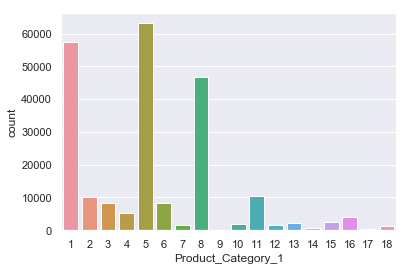

In [24]:
city_b_users=df.loc[df.City_Category=='B']
sns.countplot(x='Product_Category_1',data=city_b_users)

Similarly in City B, product 5 was purchased the most.

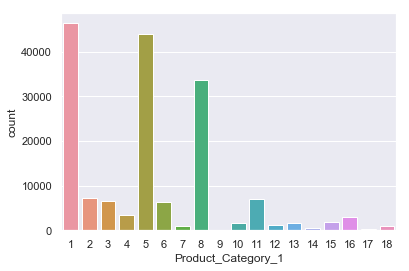

In [25]:
city_c_users=df.loc[df.City_Category=='C']
sns.countplot(x='Product_Category_1',data=city_c_users)

In City C, product 1 was bought the most.

However, across all city categories, product 5 was purchased the most (more than 60000) in City B.
Product 1 was also purchased maximum (more than 50000) in City B. Product 9 has been the least purchased across all three cities.

In [26]:
df_unique_prod=df.drop_duplicates(subset='Product_ID',inplace=False)

In [27]:
df_unique_prod.loc[df_unique_prod.Purchase==df_unique_prod['Purchase'].max()]

,User_ID,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
375,1000062,P00119342,F,36-45,A,1,0,10,13.0,0.0,23792


User ID 1000062 has the highest purchase amount among all users.

In [28]:
age=df.loc[(df.Product_Category_2==0.0) & (df.Product_Category_3==0.0)]
print(len(age))

166986


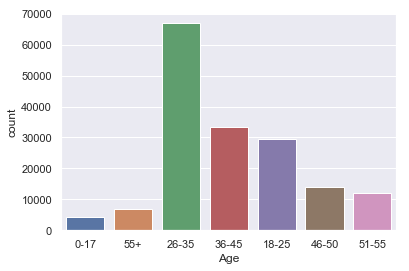

In [29]:
sns.countplot(x='Age',data=age)

Number of users in the age group of 26-35 is maximum when it comes to purchasing products of categories 2 and 3. 